<a href="https://colab.research.google.com/github/renanalvesdeveloper/Data-Science/blob/master/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="100%" src="https://i.ibb.co/XstkjGz/viol-ncia-no-rio-de-janeiro.png">

*by [Renan Alves](https://www.linkedin.com/in/renan-alves-9b1b71b7/)*

---

# Analisando a Violência no Rio de Janeiro

O Rio de Janeiro é uma das cidades mais belas do nosso país e um dos maiores destinos turísticos do Brasil, porém a cidade maravilhosa, como é conhecida, vem sofrendo em decorrência da violência urbana.

A cidade vem cada vez mais conquistando espaço na imprensa nacional e internacional.

Neste notebook, faremos uma análise em cima dos indicadores estatísticos da violência no Rio, explorando algumas das variáveis fornecidas.

---
  

## Obtenção dos Dados


Os dados foram obtidos diretamento do portal ISPDados, que é uma página de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro.

As estatísticas divulgadas no portal são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias de Polícia Civil do Estado do Rio de Janeiro, além de informações complementares de órgãos específicos da Polícia Militar do Estado do Rio de Janeiro.

Como forma de criar um controle de qualidade, antes de serem consolidados no ISP os RO são submetidos à Corregedoria Interna da Polícia Civil (COINPOL). As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.

No caso do *dataset* a ser utilizado aqui, o arquivo `csv` pode ser baixado diretamente [neste link](https://raw.githubusercontent.com/renanalvesdeveloper/Data-Science/master/violencia_rio.csv).

Para mais informações sobre esses dados você pode consultar os seguintes links:

Site oficial, do Governo do Estado do Rio de Janeiro:
http://www.ispdados.rj.gov.br/estatistica.html

Um dashboard interativo e visual pode ser encontrado no site abaixo:
http://www.ispvisualizacao.rj.gov.br/index.html

### Importando os dados


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_rio = pd.read_csv("https://raw.githubusercontent.com/renanalvesdeveloper/Data-Science/master/violencia_rio.csv")

## Análise Inicial dos Dados

Antes de começarmos a explorar nosso dataset, é preciso saber com o que estamos lidando. Para começarmos a entender melhor esse aspecto, vamos verificar as dimensões do dataset, como os nossos dados estão estruturados.



Vamos verificar as dimensões do nosso DataFrame

In [4]:
print("Número de Linhas: ", df_rio.shape[0])
print("Número de Colunas: ", df_rio.shape[1])

Número de Linhas:  344
Número de Colunas:  56


Agora que já sabemos as dimensões dos nossos dados, vamos verificar quais colunas existente em nosso DataFrame.

In [5]:
df_rio.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

Já que sabemos a quantidade de linhas e colunas que temos para analisar e quais são elas, outro passo fundamental nessa análise inicial e verificarmo o tipo de cada coluna.

Este passo é importante uma vez que nos ajudará a direcionar o nosso trabalho na etapada de limpeza dos dados.

In [6]:
df_rio.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

Vamos agora visualiar as 5 primeiras linhas do nosso DataFrame.

In [7]:
df_rio.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


Podemos notar que já nessa visualização prévia, temos uma grande quantidade de valores ausentes `NaN`.

Antes de definirmos como iremos tratar esses dados, vamos verificar o percentual de valores ausentes em todo o nosso DataSet.

In [10]:
percentual = ((df_rio.isnull().sum()/df_rio.shape[0])*100).sort_values(ascending=False)
percentual = pd.DataFrame(percentual)
percentual.columns = ["Porcentagem (%)"]
percentual.columns.name = "Colunas"
percentual

Colunas,Porcentagem (%)
roubo_bicicleta,80.232558
furto_bicicleta,80.232558
apreensao_drogas_sem_autor,52.325581
posse_drogas,52.325581
apf,52.325581
aaapai,52.325581
cmp,52.325581
trafico_drogas,52.325581
cmba,52.325581
sequestro_relampago,41.860465


Podemos observar que os crimes relacionados a bicicletas e drogas possuem um alto percentual de dados faltantes.

É possível construir uma análise usando como base as nossas colunas `vano` e `mes`, verificando assim os indices de ocorrência ao longo do tempo.

Além disso, exite a possibilidade de realizarmos análises por catégoria de crimes (Contra a vida, Contra o patrimônio, etc.)


## Informações Estatísticas da Violência no Rio de Janeiro

Usando o método `describe` podemos visualizar a distribuição estatísca do DataFrame.


In [12]:
df_rio.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

## Crimes Contra o Patrimônio - Veículos
Vamos analisar os dados relacionados aos crimes de roubo e furto de veículos.

Problema comum nas grandes metrópoles brasileiras, esse tipo de crime merece destaque em nosso projeto. Como temos dados sobre roubo, furto e recuperação de veículos, conseguimos utilizar essas informações para encontrar resultados pertinentes em relação à situação e ao combate a esse tipo de crime.

Vamos começar analisando a **média de roubo de veículos**.

In [31]:
print('A média de roubo de veículos entre 1991 e 2019 é de', round(df_rio.roubo_veiculo.mean(),2))

A média de roubo de veículos entre 1991 e 2019 é de 2448.7


Agora a **média de furtos de veículos**.

In [32]:
print('A média de furtos de veículos entre 1991 e 2019 é de', round(df_rio.furto_veiculos.mean(),2))

A média de furtos de veículos entre 1991 e 2019 é de 1674.67


Vejamos a **média recuperação de veículos**.

In [33]:
print('A média de veículos recuperados entre 1991 e 2019 é de', round(df_rio.recuperacao_veiculos.mean(),2))

A média de veículos recuperados entre 1991 e 2019 é de 1772.24


Vamos agora calcular o **percentual de veículos recuperados** em relação aos **carros roubados + carros furtados**.

In [41]:
media_roubo = df_rio.roubo_veiculo.mean()
media_furto = df_rio.furto_veiculos.mean()
media_recuperados = df_rio.recuperacao_veiculos.mean()

total_veiculos_roubados = media_roubo + media_furto

percentual = (media_recuperados/total_veiculos_roubados)*100

print('Média de veículos roubados por mês: {:.2f}'.format(total_veiculos_roubados))
print('Veículos recuperados por mês: {:.2f}'.format(media_recuperados))
print('Percentual de veículos recuperados {:.2f}%'.format(percentual))

Média de veículos roubados por mês: 4123.37
Veículos recuperados por mês: 1772.24
Percentual de veículos recuperados 42.98%


## Análise dos Homicídios Dolosos

Nesta etapa iremos analisar os homicídios.

> Iniciando pelos valores mínimos e máximos de homicídios ao longo do periodo observado no nosso dataset.

In [48]:
print('Mínimo:\t{}'.format(df_rio.hom_doloso.min()))
print('Máximo:\t{}'.format(df_rio.hom_doloso.max()))

Mínimo:	272
Máximo:	831


Vamos verificar qual o ano e o mês que tivemos essas entradas

> Registro que teve o **menor índice de homicídios**.

In [197]:
df_homicidios = df_rio[['vano','mes','hom_doloso']]
df_homicidios[df_homicidios.hom_doloso == 272]

,vano,mes,hom_doloso
293,2015,6,272


> Registro que teve o **maior índice de homicídios**.

In [199]:
df_homicidios[df_homicidios.hom_doloso ==831]

,vano,mes,hom_doloso
48,1995,1,831


> Vejamos **a média de homicídios**.

In [205]:
print('A média de homicídios entre 1991 e 2019 é de',round(df_homicidios.hom_doloso.mean(),2))

A média de homicídios entre 1991 e 2019 é de 504.56


> Vamos contruir um Ranking com a média de homicídios dolosos no período entre 1991 e 2019

In [266]:
df_homicidios.groupby(df_homicidios.vano, as_index=False).hom_doloso.mean().sort_values(by= 'hom_doloso',ascending=False)

,vano,hom_doloso
4,1995,703.166667
3,1994,700.666667
2,1993,643.333333
1,1992,636.250000
0,1991,626.500000
5,1996,604.916667
6,1997,576.916667
11,2002,573.750000
12,2003,552.000000
14,2005,551.666667


> Podemos observar que o ano de **1995** foi o ano mais violento no período analisado.

> Essa informação está de acordo com o [link](http://g1.globo.com/rio-de-janeiro/noticia/2011/12/rj-cai-de-2-para-17-colocado-em-homicidios-no-pais-diz-pesquisa.html#:~:text=O%20per%C3%ADodo%20mais%20cr%C3%ADtico%20da,vai%20de%201983%20a%201995.) de uma matéria feita pelo G1 no final do ano de 2011.


## Visualização de Dados

Nesta etapa do projeto iremos exibir alguns gráficos para auxiliar a nossa compreensão acerca dos dados de violência no Rio de Janeiro.


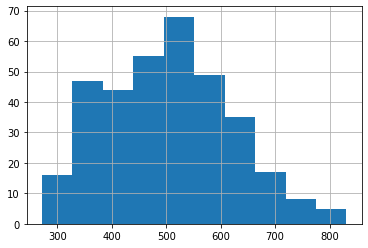

In [238]:
df_rio.hom_doloso.hist();

> Houveram no total quase 70 meses com um valor entre 500-550 homicídios dolosos registrados ao longo do período analisado.


> Vamos indexar o nosso DataFrame pela coluna `vano`, para verificar a distribuição dos roubos em coletivos ao longo dos anos.

In [0]:
df_roubo_coletivo_index = df_rio.copy()
df_roubo_coletivo_index.index = df_roubo_coletivo_index.vano

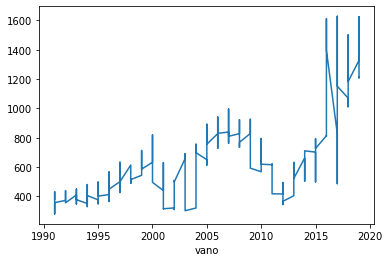

In [277]:
df_roubo_coletivo_index.roubo_em_coletivo.plot();


> Podemos observar que o roubo a coletivo tem aumentado ao longo dos anos.

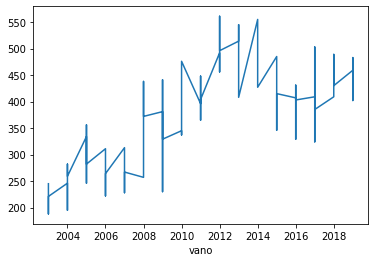

In [278]:
df_roubo_coletivo_index.estupro.plot();

> O índice de estupro teve uma queda após o período de 2012 onde tivemos o seu pico.

In [0]:
df_roubo_coletivo_index['total_celulares_roubados'] = df_roubo_coletivo_index.roubo_celular + df_roubo_coletivo_index.furto_celular

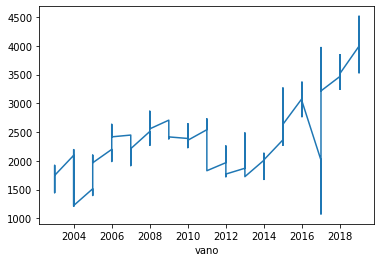

In [283]:
df_roubo_coletivo_index.total_celulares_roubados.plot();

> Podemos observar que o índice de roubo a celulares tem aumentado com passar dos anos.

## Conclusão

> Com base nos dados analisados podemos perceber que houve um período onde tivemos um pico no número de homicídios dolosos, que foi no ano de 1995. Apesar dos índices de homicídio apresentarem uma redução ao longo do período estudado, podemos observar por exemplo o aumento nos índice de roubos a coletivos e a celulares ao longo dos anos.


